In [ ]:
file=("/content/drive/MyDrive/DATASET/flightdata (1).csv")

In [ ]:
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics


In [ ]:
dataset=pd.read_csv(file)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11231 entries, 0 to 11230
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 11231 non-null  int64  
 1   QUARTER              11231 non-null  int64  
 2   MONTH                11231 non-null  int64  
 3   DAY_OF_MONTH         11231 non-null  int64  
 4   DAY_OF_WEEK          11231 non-null  int64  
 5   UNIQUE_CARRIER       11231 non-null  object 
 6   TAIL_NUM             11231 non-null  object 
 7   FL_NUM               11231 non-null  int64  
 8   ORIGIN_AIRPORT_ID    11231 non-null  int64  
 9   ORIGIN               11231 non-null  object 
 10  DEST_AIRPORT_ID      11231 non-null  int64  
 11  DEST                 11231 non-null  object 
 12  CRS_DEP_TIME         11231 non-null  int64  
 13  DEP_TIME             11124 non-null  float64
 14  DEP_DELAY            11124 non-null  float64
 15  DEP_DEL15            11124 non-null 

In [ ]:
dataset.describe()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,CRS_DEP_TIME,DEP_TIME,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
count,11231.0,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11124.000000,...,11231.000000,11116.000000,11043.000000,11043.000000,11231.000000,11231.000000,11231.000000,11043.000000,11231.000000,0.0
mean,2016.0,2.544475,6.628973,15.790758,3.960199,1334.325617,12334.516695,12302.274508,1320.798326,1327.189410,...,1537.312795,1523.978499,-2.573123,0.124513,0.010150,0.006589,190.652124,179.661233,1161.031965,NaN
std,0.0,1.090701,3.354678,8.782056,1.995257,811.875227,1595.026510,1601.988550,490.737845,500.306462,...,502.512494,512.536041,39.232521,0.330181,0.100241,0.080908,78.386317,77.940399,643.683379,NaN
min,2016.0,1.000000,1.000000,1.000000,1.000000,7.000000,10397.000000,10397.000000,10.000000,1.000000,...,2.000000,1.000000,-67.000000,0.000000,0.000000,0.000000,93.000000,75.000000,509.000000,NaN
25%,2016.0,2.000000,4.000000,8.000000,2.000000,624.000000,10397.000000,10397.000000,905.000000,905.000000,...,1130.000000,1135.000000,-19.000000,0.000000,0.000000,0.000000,127.000000,117.000000,594.000000,NaN
50%,2016.0,3.000000,7.000000,16.000000,4.000000,1267.000000,12478.000000,12478.000000,1320.000000,1324.000000,...,1559.000000,1547.000000,-10.000000,0.000000,0.000000,0.000000,159.000000,149.000000,907.000000,NaN
75%,2016.0,3.000000,9.000000,23.000000,6.000000,2032.000000,13487.000000,13487.000000,1735.000000,1739.000000,...,1952.000000,1945.000000,1.000000,0.000000,0.000000,0.000000,255.000000,236.000000,1927.000000,NaN
max,2016.0,4.000000,12.000000,31.000000,7.000000,2853.000000,14747.000000,14747.000000,2359.000000,2400.000000,...,2359.000000,2400.000000,615.000000,1.000000,1.000000,1.000000,397.000000,428.000000,2422.000000,NaN


In [ ]:
dataset.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
0,2016,1,1,1,5,DL,N836DN,1399,10397,ATL,...,2143,2102.0,-41.0,0.0,0.0,0.0,338.0,295.0,2182.0,NaN
1,2016,1,1,1,5,DL,N964DN,1476,11433,DTW,...,1435,1439.0,4.0,0.0,0.0,0.0,110.0,115.0,528.0,NaN
2,2016,1,1,1,5,DL,N813DN,1597,10397,ATL,...,1215,1142.0,-33.0,0.0,0.0,0.0,335.0,300.0,2182.0,NaN
3,2016,1,1,1,5,DL,N587NW,1768,14747,SEA,...,1335,1345.0,10.0,0.0,0.0,0.0,196.0,205.0,1399.0,NaN
4,2016,1,1,1,5,DL,N836DN,1823,14747,SEA,...,607,615.0,8.0,0.0,0.0,0.0,247.0,259.0,1927.0,NaN


**Dropping unnecessary columns**

In [ ]:
data1=dataset.drop(columns=["YEAR","ORIGIN_AIRPORT_ID","DEST_AIRPORT_ID","CRS_DEP_TIME","CRS_ARR_TIME","Unnamed: 25",])

In [ ]:
data1.head()

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN,DEST,DEP_TIME,DEP_DELAY,DEP_DEL15,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE
0,1,1,1,5,DL,N836DN,1399,ATL,SEA,1907.0,2.0,0.0,2102.0,-41.0,0.0,0.0,0.0,338.0,295.0,2182.0
1,1,1,1,5,DL,N964DN,1476,DTW,MSP,1344.0,-1.0,0.0,1439.0,4.0,0.0,0.0,0.0,110.0,115.0,528.0
2,1,1,1,5,DL,N813DN,1597,ATL,SEA,942.0,2.0,0.0,1142.0,-33.0,0.0,0.0,0.0,335.0,300.0,2182.0
3,1,1,1,5,DL,N587NW,1768,SEA,MSP,820.0,1.0,0.0,1345.0,10.0,0.0,0.0,0.0,196.0,205.0,1399.0
4,1,1,1,5,DL,N836DN,1823,SEA,DTW,2256.0,-4.0,0.0,615.0,8.0,0.0,0.0,0.0,247.0,259.0,1927.0


In [ ]:
for i in data1.columns:
    print(data1[i].value_counts())

3    3167
2    2777
4    2745
1    2542
Name: QUARTER, dtype: int64
8     1127
7     1078
6      979
9      962
10     955
5      916
12     899
11     891
3      885
4      882
1      860
2      797
Name: MONTH, dtype: int64
8     390
23    381
28    379
11    378
14    378
21    378
22    376
26    375
18    373
9     372
2     371
10    370
15    370
12    369
19    368
27    368
5     366
17    366
16    365
24    363
1     363
13    362
20    362
29    361
25    360
4     360
6     357
7     355
3     351
30    335
31    209
Name: DAY_OF_MONTH, dtype: int64
5    1668
1    1652
4    1637
3    1624
2    1607
7    1593
6    1450
Name: DAY_OF_WEEK, dtype: int64
DL    11231
Name: UNIQUE_CARRIER, dtype: int64
N857DZ    76
N856DN    75
N581NW    73
N582NW    72
N584NW    72
          ..
N906AT     1
N801NW     1
N612DL     1
N328NB     1
N301DN     1
Name: TAIL_NUM, Length: 789, dtype: int64
888     98
589     96
1991    96
588     95
902     94
        ..
2849     1
1531     1
1493     

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11231 entries, 0 to 11230
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   QUARTER              11231 non-null  int64  
 1   MONTH                11231 non-null  int64  
 2   DAY_OF_MONTH         11231 non-null  int64  
 3   DAY_OF_WEEK          11231 non-null  int64  
 4   UNIQUE_CARRIER       11231 non-null  object 
 5   TAIL_NUM             11231 non-null  object 
 6   FL_NUM               11231 non-null  int64  
 7   ORIGIN               11231 non-null  object 
 8   DEST                 11231 non-null  object 
 9   DEP_TIME             11124 non-null  float64
 10  DEP_DELAY            11124 non-null  float64
 11  DEP_DEL15            11124 non-null  float64
 12  ARR_TIME             11116 non-null  float64
 13  ARR_DELAY            11043 non-null  float64
 14  ARR_DEL15            11043 non-null  float64
 15  CANCELLED            11231 non-null 

In [ ]:
import matplotlib.pyplot as plt

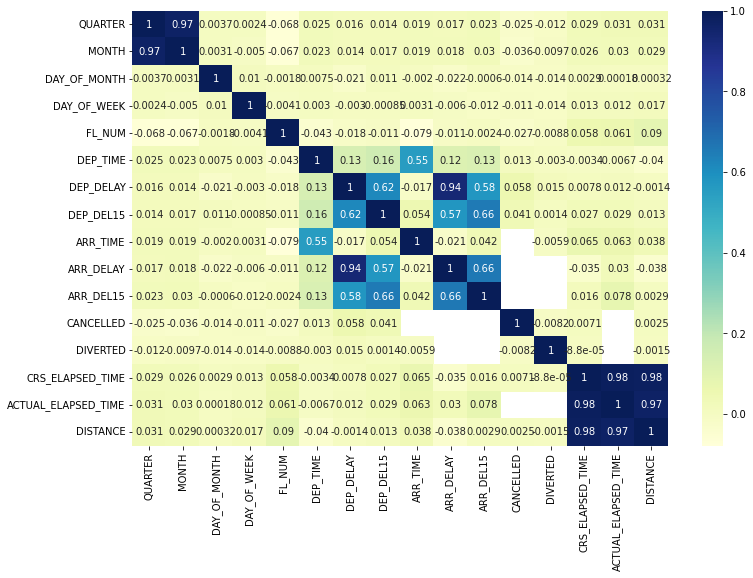

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(data1.corr(),cmap="YlGnBu",annot=True)


**Data Cleaning**

In [ ]:
data1.isnull().sum()

QUARTER                  0
MONTH                    0
DAY_OF_MONTH             0
DAY_OF_WEEK              0
UNIQUE_CARRIER           0
TAIL_NUM                 0
FL_NUM                   0
ORIGIN                   0
DEST                     0
DEP_TIME               107
DEP_DELAY              107
DEP_DEL15              107
ARR_TIME               115
ARR_DELAY              188
ARR_DEL15              188
CANCELLED                0
DIVERTED                 0
CRS_ELAPSED_TIME         0
ACTUAL_ELAPSED_TIME    188
DISTANCE                 0
dtype: int64

In [ ]:
data1.duplicated().sum()

0

In [ ]:
data1.iloc[179,:].isnull(),data1.iloc[179,:]

(QUARTER                False
 MONTH                  False
 DAY_OF_MONTH           False
 DAY_OF_WEEK            False
 UNIQUE_CARRIER         False
 TAIL_NUM               False
 FL_NUM                 False
 ORIGIN                 False
 DEST                   False
 DEP_TIME                True
 DEP_DELAY               True
 DEP_DEL15               True
 ARR_TIME                True
 ARR_DELAY               True
 ARR_DEL15               True
 CANCELLED              False
 DIVERTED               False
 CRS_ELAPSED_TIME       False
 ACTUAL_ELAPSED_TIME     True
 DISTANCE               False
 Name: 179, dtype: bool, QUARTER                     1
 MONTH                       1
 DAY_OF_MONTH               10
 DAY_OF_WEEK                 7
 UNIQUE_CARRIER             DL
 TAIL_NUM               N924DN
 FL_NUM                     86
 ORIGIN                    MSP
 DEST                      DTW
 DEP_TIME                  NaN
 DEP_DELAY                 NaN
 DEP_DEL15                 NaN
 ARR

In [ ]:
data1[(data1["TAIL_NUM"]=="N924DN")&(data1["FL_NUM"]==86)]

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN,DEST,DEP_TIME,DEP_DELAY,DEP_DEL15,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE
179,1,1,10,7,DL,N924DN,86,MSP,DTW,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,104.0,NaN,528.0


In [ ]:
data1[(data1["DEP_DEL15"]==0)&(data1["ARR_DEL15"]==1)]

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN,DEST,DEP_TIME,DEP_DELAY,DEP_DEL15,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE
34,1,1,4,1,DL,N827DN,1770,SEA,MSP,1521.0,1.0,0.0,2048.0,16.0,1.0,0.0,0.0,192.0,207.0,1399.0
128,1,1,7,4,DL,N931DN,744,MSP,ATL,1010.0,5.0,0.0,1349.0,15.0,1.0,0.0,0.0,149.0,159.0,907.0
146,1,1,8,5,DL,N678DL,8,MSP,ATL,1735.0,3.0,0.0,2133.0,28.0,1.0,0.0,0.0,153.0,178.0,907.0
166,1,1,8,5,DL,N711ZX,1473,SEA,JFK,1110.0,0.0,0.0,1950.0,20.0,1.0,0.0,0.0,320.0,340.0,2422.0
167,1,1,8,5,DL,N824DN,1598,SEA,ATL,620.0,0.0,0.0,1416.0,15.0,1.0,0.0,0.0,281.0,296.0,2182.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11120,4,12,29,4,DL,N301DN,811,ATL,MSP,1347.0,-3.0,0.0,1552.0,20.0,1.0,0.0,0.0,162.0,185.0,907.0
11168,4,12,30,5,DL,N947DL,984,ATL,JFK,2053.0,-2.0,0.0,2330.0,15.0,1.0,0.0,0.0,140.0,157.0,760.0
11173,4,12,31,6,DL,N659DL,2610,ATL,MSP,733.0,8.0,0.0,921.0,21.0,1.0,0.0,0.0,155.0,168.0,907.0
11187,4,12,3,6,DL,N627DL,95,ATL,DTW,1249.0,14.0,0.0,1500.0,24.0,1.0,0.0,0.0,121.0,131.0,594.0


In [ ]:
data1.describe()

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_NUM,DEP_TIME,DEP_DELAY,DEP_DEL15,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE
count,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11124.000000,11124.000000,11124.000000,11116.000000,11043.000000,11043.000000,11231.000000,11231.000000,11231.000000,11043.000000,11231.000000
mean,2.544475,6.628973,15.790758,3.960199,1334.325617,1327.189410,8.460266,0.142844,1523.978499,-2.573123,0.124513,0.010150,0.006589,190.652124,179.661233,1161.031965
std,1.090701,3.354678,8.782056,1.995257,811.875227,500.306462,36.762969,0.349930,512.536041,39.232521,0.330181,0.100241,0.080908,78.386317,77.940399,643.683379
min,1.000000,1.000000,1.000000,1.000000,7.000000,1.000000,-16.000000,0.000000,1.000000,-67.000000,0.000000,0.000000,0.000000,93.000000,75.000000,509.000000
25%,2.000000,4.000000,8.000000,2.000000,624.000000,905.000000,-3.000000,0.000000,1135.000000,-19.000000,0.000000,0.000000,0.000000,127.000000,117.000000,594.000000
50%,3.000000,7.000000,16.000000,4.000000,1267.000000,1324.000000,-1.000000,0.000000,1547.000000,-10.000000,0.000000,0.000000,0.000000,159.000000,149.000000,907.000000
75%,3.000000,9.000000,23.000000,6.000000,2032.000000,1739.000000,4.000000,0.000000,1945.000000,1.000000,0.000000,0.000000,0.000000,255.000000,236.000000,1927.000000
max,4.000000,12.000000,31.000000,7.000000,2853.000000,2400.000000,645.000000,1.000000,2400.000000,615.000000,1.000000,1.000000,1.000000,397.000000,428.000000,2422.000000


**EDA or Data Analysis**

**Data Visualization**

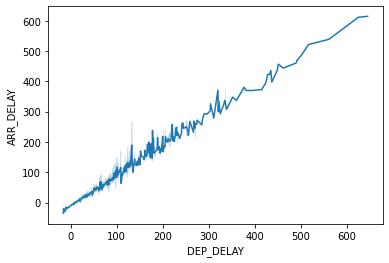

In [ ]:
sns.lineplot(x="DEP_DELAY",y="ARR_DELAY",data=data1)

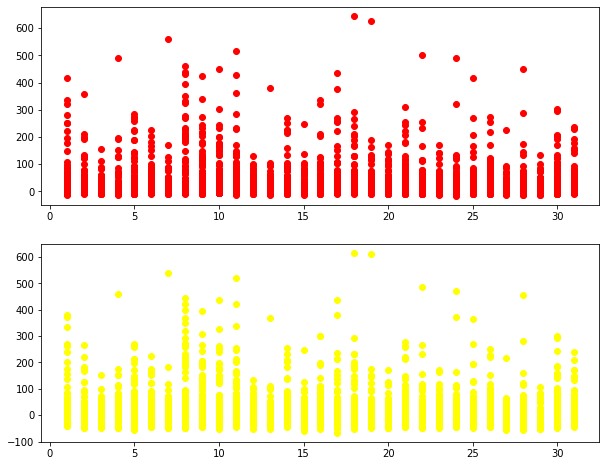

In [ ]:
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
plt.scatter(data1["DAY_OF_MONTH"],data1["DEP_DELAY"],color="red")
plt.subplot(2,1,2)
plt.scatter(data1["DAY_OF_MONTH"],data1["ARR_DELAY"],color="yellow")
plt.show()

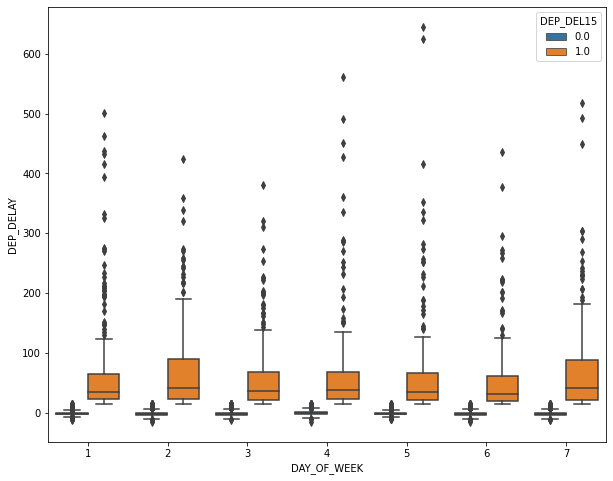

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(x="DAY_OF_WEEK",y="DEP_DELAY",data=data1,hue="DEP_DEL15")


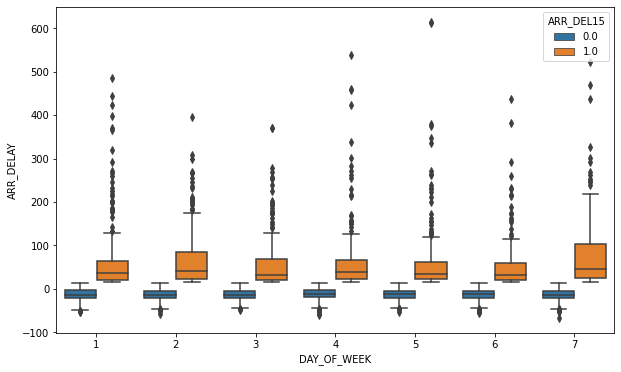

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x="DAY_OF_WEEK",y="ARR_DELAY",data=data1,hue="ARR_DEL15")

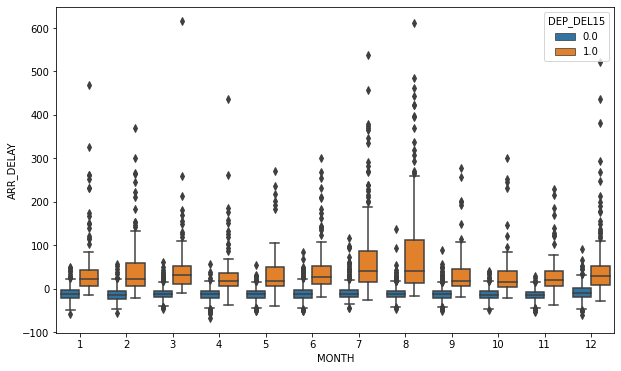

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x="MONTH",y="ARR_DELAY",data=data1,hue="DEP_DEL15")


In [ ]:
data1.groupby(by="DAY_OF_WEEK")["DEP_DEL15"].sum()

DAY_OF_WEEK
1    253.0
2    213.0
3    204.0
4    245.0
5    250.0
6    198.0
7    226.0
Name: DEP_DEL15, dtype: float64

In [ ]:
data1.groupby(by="MONTH")["DEP_DEL15"].sum()

MONTH
1     113.0
2     115.0
3     104.0
4      96.0
5      86.0
6     168.0
7     219.0
8     246.0
9      88.0
10     86.0
11     66.0
12    202.0
Name: DEP_DEL15, dtype: float64

In [ ]:
data1[data1["ARR_DELAY"]>=300]


,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN,DEST,DEP_TIME,DEP_DELAY,DEP_DEL15,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE
202,1,1,10,7,DL,N125DL,1893,DTW,ATL,1339.0,304.0,1.0,1615.0,326.0,1.0,0.0,0.0,134.0,156.0,594.0
565,1,1,24,7,DL,N3753,463,JFK,ATL,1912.0,492.0,1.0,2127.0,470.0,1.0,0.0,0.0,157.0,135.0,760.0
1199,1,2,16,2,DL,N935DL,86,MSP,DTW,1916.0,321.0,1.0,2140.0,300.0,1.0,0.0,0.0,105.0,84.0,528.0
1605,1,2,24,3,DL,N983DL,1156,ATL,JFK,2300.0,320.0,1.0,218.0,371.0,1.0,0.0,0.0,147.0,198.0,760.0
2535,1,3,18,5,DL,N809DN,2330,SEA,ATL,1930.0,645.0,1.0,246.0,615.0,1.0,0.0,0.0,286.0,256.0,2182.0
2723,2,4,10,7,DL,N624AG,1336,SEA,JFK,1518.0,449.0,1.0,2317.0,437.0,1.0,0.0,0.0,311.0,299.0,2422.0
4814,2,6,16,4,DL,N319NB,2816,JFK,MSP,2130.0,335.0,1.0,2318.0,301.0,1.0,0.0,0.0,202.0,168.0,1029.0
5336,3,7,1,5,DL,N171DN,43,JFK,ATL,2100.0,335.0,1.0,27.0,374.0,1.0,0.0,0.0,168.0,207.0,760.0
5340,3,7,1,5,DL,N355NB,2214,MSP,JFK,2257.0,322.0,1.0,307.0,335.0,1.0,0.0,0.0,177.0,190.0,1029.0
5378,3,7,1,5,DL,N377NW,984,ATL,JFK,410.0,415.0,1.0,604.0,380.0,1.0,0.0,0.0,149.0,114.0,760.0


**Feature Engineering**

In [ ]:
sm=[6,7,8]
wt=[9,10,11]
sp=[12,1,2,3]
fl=[4,5]

In [ ]:
data1["SEASON"]=np.where(data1["MONTH"].isin(sm),0,np.where(data1["MONTH"].isin(sp),2,3))

In [ ]:
data1["SEASON"].value_counts()

3    4606
2    3441
0    3184
Name: SEASON, dtype: int64

**Encoding Catagorical columns to numerical**

In [ ]:
data1["CANCELLED"]=np.where(data1["CANCELLED"]==1,4,0)

In [ ]:
data1["DIVERTED"]=np.where(data1["DIVERTED"]==1,3,0)

In [ ]:
data1.CANCELLED.unique(),data1.DIVERTED.unique()

(array([0, 4]), array([0, 3]))

In [ ]:
data1["DELAY_15"]=data1["ARR_DEL15"]+data1["DEP_DEL15"]
data1.DELAY_15.unique()

array([ 0.,  1.,  2., nan])

In [ ]:
data1["DELAY_15"].fillna(0,inplace=True)
data1.DELAY_15.unique()

array([0., 1., 2.])

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11231 entries, 0 to 11230
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   QUARTER              11231 non-null  int64  
 1   MONTH                11231 non-null  int64  
 2   DAY_OF_MONTH         11231 non-null  int64  
 3   DAY_OF_WEEK          11231 non-null  int64  
 4   UNIQUE_CARRIER       11231 non-null  object 
 5   TAIL_NUM             11231 non-null  object 
 6   FL_NUM               11231 non-null  int64  
 7   ORIGIN               11231 non-null  object 
 8   DEST                 11231 non-null  object 
 9   DEP_TIME             11124 non-null  float64
 10  DEP_DELAY            11124 non-null  float64
 11  DEP_DEL15            11124 non-null  float64
 12  ARR_TIME             11116 non-null  float64
 13  ARR_DELAY            11043 non-null  float64
 14  ARR_DEL15            11043 non-null  float64
 15  CANCELLED            11231 non-null 

**Feature Engineering**

In [ ]:
data1["NDELAY"]=data1["DELAY_15"]+data1["CANCELLED"]+data1["DIVERTED"]

In [ ]:
data1.NDELAY.unique()

array([0., 1., 2., 3., 4.])

In [ ]:
len(data1["TAIL_NUM"].value_counts()),len(data1["FL_NUM"].value_counts())

(789, 690)

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11231 entries, 0 to 11230
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   QUARTER              11231 non-null  int64  
 1   MONTH                11231 non-null  int64  
 2   DAY_OF_MONTH         11231 non-null  int64  
 3   DAY_OF_WEEK          11231 non-null  int64  
 4   UNIQUE_CARRIER       11231 non-null  object 
 5   TAIL_NUM             11231 non-null  object 
 6   FL_NUM               11231 non-null  int64  
 7   ORIGIN               11231 non-null  object 
 8   DEST                 11231 non-null  object 
 9   DEP_TIME             11124 non-null  float64
 10  DEP_DELAY            11124 non-null  float64
 11  DEP_DEL15            11124 non-null  float64
 12  ARR_TIME             11116 non-null  float64
 13  ARR_DELAY            11043 non-null  float64
 14  ARR_DEL15            11043 non-null  float64
 15  CANCELLED            11231 non-null 

In [ ]:
clm=["UNIQUE_CARRIER","DEP_TIME","DEP_DELAY","DEP_DEL15","ARR_TIME","ARR_DELAY","ARR_DEL15","ACTUAL_ELAPSED_TIME","DELAY_15"]
data2=data1.drop(columns=clm)
data2.head()

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,TAIL_NUM,FL_NUM,ORIGIN,DEST,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,DISTANCE,SEASON,NDELAY
0,1,1,1,5,N836DN,1399,ATL,SEA,0,0,338.0,2182.0,2,0.0
1,1,1,1,5,N964DN,1476,DTW,MSP,0,0,110.0,528.0,2,0.0
2,1,1,1,5,N813DN,1597,ATL,SEA,0,0,335.0,2182.0,2,0.0
3,1,1,1,5,N587NW,1768,SEA,MSP,0,0,196.0,1399.0,2,0.0
4,1,1,1,5,N836DN,1823,SEA,DTW,0,0,247.0,1927.0,2,0.0


In [ ]:
data3=data2.drop(columns=["TAIL_NUM","FL_NUM"])

In [ ]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11231 entries, 0 to 11230
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   QUARTER           11231 non-null  int64  
 1   MONTH             11231 non-null  int64  
 2   DAY_OF_MONTH      11231 non-null  int64  
 3   DAY_OF_WEEK       11231 non-null  int64  
 4   ORIGIN            11231 non-null  object 
 5   DEST              11231 non-null  object 
 6   CANCELLED         11231 non-null  int64  
 7   DIVERTED          11231 non-null  int64  
 8   CRS_ELAPSED_TIME  11231 non-null  float64
 9   DISTANCE          11231 non-null  float64
 10  SEASON            11231 non-null  int64  
 11  NDELAY            11231 non-null  float64
dtypes: float64(3), int64(7), object(2)
memory usage: 1.0+ MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5f3a0546d0>,
      dtype=object)

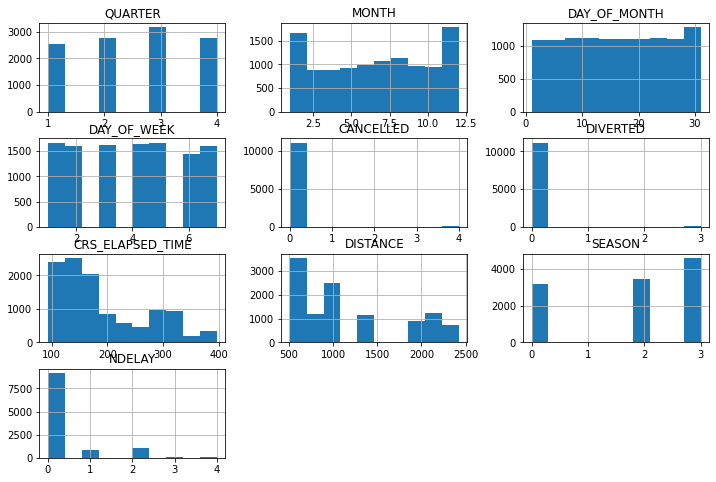

In [ ]:
data3.hist(figsize=(12,8))

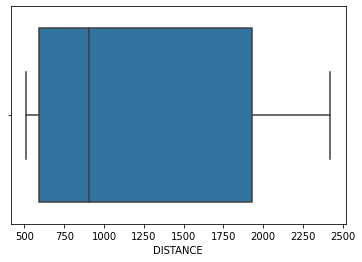

In [ ]:
sns.boxplot(x='DISTANCE',data=data3)


In [ ]:
data3.NDELAY.value_counts()

0.0    9130
2.0    1035
1.0     878
4.0     114
3.0      74
Name: NDELAY, dtype: int64

**Spliting Dependent and Independent Variables**

In [ ]:
x=data2.drop(columns=["NDELAY","TAIL_NUM"])
y=data2.NDELAY

**Encoding Categorical cloumns to numerical**

In [ ]:
x["ORIGIN"].replace({"ATL":1,'DTW':2,'JFK':3,'MSP':4,'SEA':5},inplace=True)
x["DEST"].replace({"ATL":1,'DTW':2,'JFK':3,'MSP':4,'SEA':5},inplace=True)

**Splitting Dataset as Training and Testing data**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
x_train.shape,x_test.shape

((8984, 12), (2247, 12))

**Model Building**

**DecisionTree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()
dc.fit(x_train,y_train)
dc.score(x_test,y_test)

0.6973742768135291

**RandomForest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=50,random_state=42)
rf.fit(x_train,y_train)
rf.score(x_test,y_test)

0.8095238095238095

In [ ]:
pd.DataFrame(rf.predict(x_test)).value_counts()

0.0    2139
2.0      45
1.0      27
4.0      21
3.0      15
dtype: int64

In [ ]:
x_test.iloc[[99,88,22],:]

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_NUM,ORIGIN,DEST,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,DISTANCE,SEASON
8246,3,9,24,6,1904,1,2,0,0,121.0,594.0,3
11019,4,12,26,1,753,4,5,0,0,236.0,1399.0,2
5999,3,7,21,4,2590,5,3,0,0,322.0,2422.0,0


In [ ]:
y_test.iloc[[8,21,912]]

10541    1.0
9412     0.0
5760     2.0
Name: NDELAY, dtype: float64

In [ ]:
rf.predict(x_test.iloc[[8,21,912],:])

array([1., 0., 0.])

In [ ]:
pd.DataFrame(dc.predict(x_test)).value_counts()

0.0    1753
2.0     249
1.0     209
4.0      21
3.0      15
dtype: int64

**LogisticRegression**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr1=LogisticRegression(solver='sag')
lr1.fit(x_train,y_train)
lr1.score(x_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


0.7997329773030708

In [ ]:
lr1.predict(x_test).sum()

0.0

**SVM**

In [ ]:
from sklearn.svm import SVC
svm=SVC(kernel='sigmoid')
svm.fit(x_train,y_train)
svm.score(x_test,y_test)

0.7378727191811304

In [ ]:
pd.DataFrame(svm.predict(x_test)).value_counts()

0.0    2050
1.0     197
dtype: int64

In [ ]:
pd.DataFrame(y_test).value_counts()

NDELAY
0.0       1797
2.0        233
1.0        181
4.0         21
3.0         15
dtype: int64

**KNearestNeighborsClassifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.7894971072541166

In [ ]:
pd.DataFrame(knn.predict(x_test)).value_counts()

0.0    2187
2.0      33
1.0      26
4.0       1
dtype: int64

In [ ]:
knn.predict(x_test.iloc[[8,21,912],:])

array([0., 0., 0.])

**Evaluation Of Random Forest**

Testing Sensitivity for Random Forest 0.9138110072689511
Testing Specificity for Random Forest 0.25
Testing Precision for Random Forest 0.9898762654668166
Testing accuracy for Random Forest 0.8095238095238095


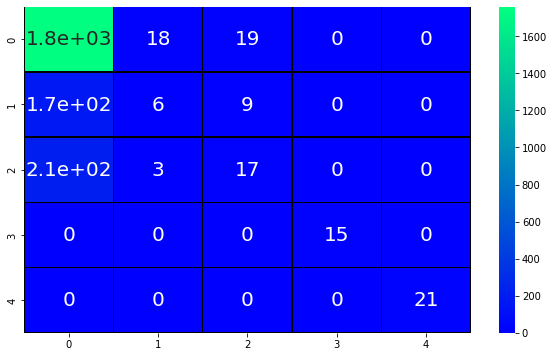

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
pred=rf.predict(x_test)
cm=confusion_matrix(y_test, pred)
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
#print(round(accuracy_score(prediction3,y_test)*100,2))
#print('Testing Accuracy for knn',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Random Forest',(TP/(TP+FN)))
print('Testing Specificity for Random Forest',(TN/(TN+FP)))
print('Testing Precision for Random Forest',(TP/(TP+FP)))
print('Testing accuracy for Random Forest',accuracy_score(y_test, pred))

In [ ]:
print(classification_report(y_test,pred))#RandomForest

              precision    recall  f1-score   support

         0.0       0.82      0.98      0.89      1797
         1.0       0.22      0.03      0.06       181
         2.0       0.38      0.07      0.12       233
         3.0       1.00      1.00      1.00        15
         4.0       1.00      1.00      1.00        21

    accuracy                           0.81      2247
   macro avg       0.68      0.62      0.61      2247
weighted avg       0.73      0.81      0.75      2247



**Evaluation Of Decission Tree**

Testing Accuracy for Decision Tree 0.8376550169109357
Testing Sensitivity for Decision Tree 0.9147335423197492
Testing Specificity for Decision Tree 0.15083798882681565
Testing Precision for Decision Tree 0.9056486654252017
Testing accuracy for Decision Tree 0.6973742768135291


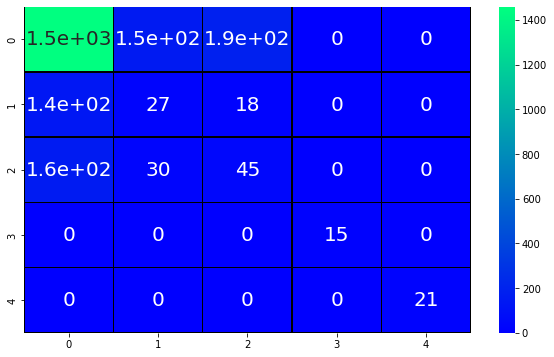

In [ ]:
pred1=dc.predict(x_test)
cm1=confusion_matrix(y_test, pred1)
plt.figure(figsize=(10,6))
sns.heatmap(cm1, annot=True,cmap='winter',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm1[0][0]
TN=cm1[1][1]
FN=cm1[1][0]
FP=cm1[0][1]
#print(round(accuracy_score(prediction3,y_test)*100,2))
print('Testing Accuracy for Decision Tree',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Decision Tree',(TP/(TP+FN)))
print('Testing Specificity for Decision Tree',(TN/(TN+FP)))
print('Testing Precision for Decision Tree',(TP/(TP+FP)))
print('Testing accuracy for Decision Tree',accuracy_score(y_test, pred1))

In [ ]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

         0.0       0.83      0.81      0.82      1797
         1.0       0.13      0.15      0.14       181
         2.0       0.18      0.19      0.19       233
         3.0       1.00      1.00      1.00        15
         4.0       1.00      1.00      1.00        21

    accuracy                           0.70      2247
   macro avg       0.63      0.63      0.63      2247
weighted avg       0.71      0.70      0.70      2247



In [ ]:
import pickle

In [ ]:
pickle.dump(rf,open("rfmodel.pkl",'wb'))